### Tarea 2


### Calzada Jasso Andres Geovani 23265539

#### 3 Types of Data Cleaning You Must Know in Python


La limpieza de datos es una de las tareas que consumen más tiempo en el análisis de datos, aunado a ello los datos en la mayoria de las ocasiones viene de una manera incorrecta.  
Contiene nombres de columnas incorrectos o abreviados, datos faltantes, tipos de datos incorrectos, demasiada información en una sola columna, etc.
Es importante solucionar estos problemas antes de procesar los datos. En última instancia, los datos limpios siempre aumentan la productividad y le permiten crear conocimientos mejores y más precisos.
En este ejemplo se muestran 3 tipos de limpieza de datos que nos ayudarán a mejorar la información con la que se quiera trabajar en un futuro.
Lo primero que debemos hacer es importar las librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Obtenemos una descripción general de lo que contiene nuestro archivo .csv

df = pd.read_csv("archive/full.csv") 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

Comencemos primero con los pasos de limpieza más sencillos, lo que puede ahorrar algo de memoria y tiempo a medida que avanza con el procesamiento.

## *Eliminar columnas irrelevantes y no utilizadas* 

En esta base de datos se tiene 21 columnas, de las cuales no se hara uso de todas 

Todo lo que necesita hacer es crear una lista de estos nombres de columnas y usarla en la df.drop() función como se muestra a continuación


In [3]:
'''
Se eliminan las columnas que seran inecesarias durantes el procesamiento, para ellos se hace uso de la función mostrada 
poniendo como argumento la lista de columnas a remover
'''

columns_to_drop = ['PassengerId', 'SibSp', 
                   'Parch', 'WikiId', 
                   'Name_wiki', 'Age_wiki']
df.drop(columns_to_drop, inplace=True, axis = 1) #Un inconveniente menor de eliminar las columnas usando el método .drop()es que altera el DataFrame 
                                                 #original cuando usas inplace = True
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


Alternativamente, puede surgir un escenario en el que desee eliminar una gran cantidad de columnas y conservar solo entre 4 y 5 columnas. En ese caso, en lugar de usar, df.drop() debes usar df.copy() con un número seleccionado de columnas.

Por ejemplo, si desea utilizar solo las columnas Nombre, Sexo, Edad y Sobrevivientes del conjunto de datos, puede crear subconjuntos del conjunto de datos original df.copy() como se muestra a continuación.

In [ ]:
df1 = df[["Name","Age","Sex","Survived"]].copy()
df1.head()

Dependiendo de cuáles sean los requisitos reales de su tarea, puede utilizar cualquiera de los métodos anteriores para elegir solo las columnas relevantes.

## **Manejo de valores faltantes o NaN**

En la mayoría de los conjuntos de datos, se hace inevitable enfrentarse a valores faltantes, lo cual constituye una de las tareas más desafiantes en el proceso de limpieza de datos. Es crucial tener en cuenta que, si tiene la intención de emplear estos datos en tareas de aprendizaje automático, es importante destacar que la mayoría de los modelos no admiten valores faltantes.

##### *¿Pero cómo encontrar los datos que faltan?*

Hay varias formas de averiguar en qué sección o columnas del conjunto de datos faltan los valores. A continuación se presentan las cuatro técnicas comúnmente utilizadas para descubrir los datos faltantes.

#####  **El método .info()**

Esta es una de las formas más sencillas de saber si faltan valores en alguna columna. Cuando lo utilice, df.info() podrá ver una descripción general rápida del DataFrame df como se muestra a continuación.

In [6]:
df.info()
#Como se puede notar que en la fila 1, 4, 7, 12, 13 se encunetran datos faltantes en la base de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Ticket       1309 non-null   object 
 6   Fare         1308 non-null   float64
 7   Cabin        295 non-null    object 
 8   Embarked     1307 non-null   object 
 9   Hometown     1304 non-null   object 
 10  Boarded      1304 non-null   object 
 11  Destination  1304 non-null   object 
 12  Lifeboat     502 non-null    object 
 13  Body         130 non-null    object 
 14  Class        1304 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 153.5+ KB


Los números de las columnas que se muestran arriba son aquellos en los que faltan varios valores. Idealmente, cada columna de este conjunto de datos debería contener 1309 valores, pero este resultado muestra que la mayoría de las columnas contienen valores inferiores a 1309. Si observamos la clase "Class" menciona que todos los valores se encuentrane en el DataFrame, en comparación de los datos mencionados con los números 1, 4, 7, 12, 13. Ya que son los datos a los cuales les fantan datos 

##### **Heatmap of missing data**

Es una de las formas comunes de visualizar los datos faltantes. Puede crear un mapa de calor de datos codificando los datos como valores booleanos, es decir, 1 o 0, y puede usar la función pandas .isna() para ello.

##### *¿Qué hay .isna() en los pandas?*

El método isna() devuelve un objeto DataFrame donde todos los valores se reemplazan con un valor booleano Verdadero NaN y, en caso contrario, Falso.

Lo que necesita hacer es escribir solo una línea de código como se muestra a continuación.

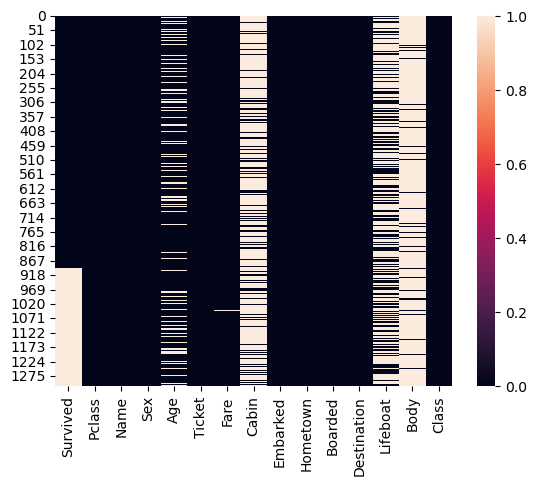

In [8]:
sns.heatmap(df.isna());

#Es obvio darse cuenta que usando esta función 

El eje X en el gráfico anterior muestra todos los nombres de las columnas, mientras que el eje Y representa los números de índice o fila. La leyenda del lado derecho informa sobre los valores booleanos utilizados para indicar los datos faltantes.
Esto es util para comprender en qué parte o entre qué números de índice faltan datos en una columna específica.
Aunque existe otra manera para visualizar los datos de otra manera con la misma función, por lo que se puede utilizar.


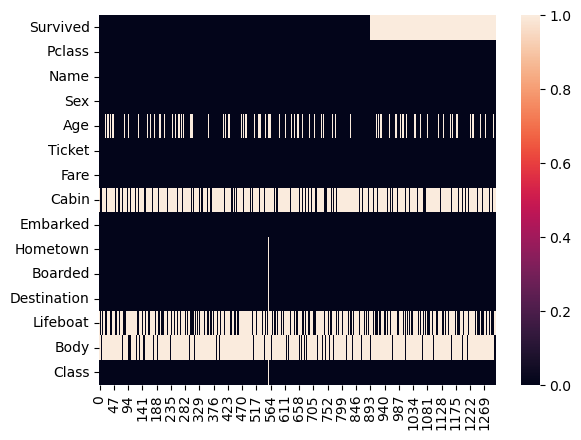

In [10]:
sns.heatmap(df.isna().transpose());

# Donde simplemente se usa la función 'transpose' para visualizar la gráfica de la misma manera 

Aunque los mapas de calor proporcionan una idea sobre la ubicación de los datos faltantes, no le informan sobre la cantidad de datos faltantes. Y puedes obtenerlo usando el siguiente método.

##### **Missing data as a percentage of total data**

In [11]:
print("Amount of missing values in - ")
for column in df.columns:
    percentage_missing = np.mean(df[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
Survived : 32%
Pclass : 0%
Name : 0%
Sex : 0%
Age : 20%
Ticket : 0%
Fare : 0%
Cabin : 77%
Embarked : 0%
Hometown : 0%
Boarded : 0%
Destination : 0%
Lifeboat : 62%
Body : 90%
Class : 0%


De esta manera se puede ver (en porcentajes) faltan valores en las columnas individuales. Esto puede resultar útil al manejar estos valores faltantes.

No existe una forma estándar de tratar los datos faltantes. La única forma es observar la columna individual, la cantidad de valores que faltan en ella y la importancia de esa columna en el futuro.

Según las observaciones anteriores, puede utilizar cualquiera de los 3 métodos siguientes para manejar los datos faltantes.

1. Eliminar el registro : eliminar un registro completo en un índice, cuando a una columna específica le falta un valor o NaN en él. Se debe tener en cuenta que esta técnica puede reducir drásticamente la cantidad de registros en el conjunto de datos si la columna mencionada tiene una gran cantidad de valores faltantes.

2. Suelte la columna o característica : esto requiere una buena investigación de una columna específica para comprender su importancia en el futuro. Puede hacer esto solo cuando esté seguro de que esta función no proporciona ninguna información útil, por ejemplo, PassengerIduna función en este conjunto de datos.

3. Imputar datos faltantes : en esta técnica, puede sustituir los valores faltantes NaN por la media, la mediana o la moda de la misma columna.


##### **Corregir los tipos de datos**

El tipo de datos de cada columna debe ser correcto y apropiado para su uso futuro.
Por ejemplo, en el conjunto de datos de Titanic puede ver los tipos de datos de columna .info ()como se muestra a continuación.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Ticket       1309 non-null   object 
 6   Fare         1308 non-null   float64
 7   Cabin        295 non-null    object 
 8   Embarked     1307 non-null   object 
 9   Hometown     1304 non-null   object 
 10  Boarded      1304 non-null   object 
 11  Destination  1304 non-null   object 
 12  Lifeboat     502 non-null    object 
 13  Body         130 non-null    object 
 14  Class        1304 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 153.5+ KB


Observe que para los datos en las columnas Edad y Sobrevivientes se tiene el tipo de dato float64, sin embargo, Edad siempre debe ser un número entero y Survived debe tener solo dos tipos de valores: Sí o No.

Para entenderlo mejor, veamos 5 valores aleatorios en estas columnas.

In [13]:
df[["Name","Sex","Survived","Age"]].sample(5)

,Name,Sex,Survived,Age
958,"Moore, Mr. Clarence Bloomfield",male,NaN,47.0
993,"Foley, Mr. William",male,NaN,NaN
402,"Jussila, Miss. Mari Aina",female,0.0,21.0
1058,"Ford, Mr. Edward Watson",male,NaN,18.0
1025,"Dintcheff, Mr. Valtcho",male,NaN,43.0


Además de los valores faltantes, la columna survived se tienen dos valores, 0.0 & 1.0, que idealmente deberían ser 0 y 1 como booleanos para No & Yes, respectivamente. Además, la columna Edad contiene valores en formato decimal.

Además de los pasos de limpieza de datos anteriores, es posible que también se necesiten algunas de las siguientes formas de limpieza de datos, según su caso de uso.

1. Reemplazar valores en una columna : a veces, las columnas de su conjunto de datos contienen valores como Verdadero – Falso, Sí – No, que se pueden reemplazar fácilmente con 1& 0para que el conjunto de datos se pueda utilizar para aplicaciones de aprendizaje automático.

2. Eliminar valores atípicos : los valores atípicos son puntos de datos que difieren significativamente de otras observaciones. Sin embargo, no siempre es una buena idea descartar un valor atípico. Se necesita una evaluación cuidadosa de estos puntos de datos significativamente diferentes. 

3. Eliminar duplicados : puede considerar datos duplicados cuando todos los valores en todas las columnas dentro de los registros son iguales. Y el método Pandas DataFrame .drop_duplicates() es bastante útil para eliminar duplicados.

### **Conlcusión**

A medida que hemos analizado a lo largo del artículo, respaldado por ejemplos concretos en el código, es innegable que llevar a cabo una correcta limpieza de datos es un paso crítico para evitar que información problemática nos cause dificultades en el futuro. Más allá de depender exclusivamente de una computadora para facilitar este proceso, es esencial para comprender mejor los datos y asegurar una interpretación precisa. La persistencia de datos problemáticos puede tener un impacto considerable.
Por lo tanto, es altamente beneficioso realizar una limpieza exhaustiva de los datos, lo que nos permitirá trabajar de manera más eficiente y, sobre todo, precisa. 